In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm
import matplotlib.pyplot as plt
from models.hd_regression_model import HDRegressionModel
from models.ld_regression_model import LDRegressionModel
from sampling.least_squares_sampler import LeastSquaresSampler
from sampling.sghmc_sampling import SGHMCsampler
from sampling.em_optimiser import EMOptimiser
from helper_functions import marginal_2d

In [2]:
data = pd.read_csv('data/synthetic_data.csv').to_numpy()
d = data.shape[1] - 1
n = data.shape[0]
y = data[:n,d]
X = data[:n,:d]

In [3]:
print(X.shape)

(9999, 200)


In [4]:
# create embedding function
def phi(x):
	return x

In [5]:
var_observation = 1
var_prior = 1
A = np.linalg.inv(np.diag(np.full(d, var_prior)))
model = HDRegressionModel(X, y, np.full(n, var_observation), A, phi)
ld_model = LDRegressionModel(X, y, np.full(len(X), var_observation), A, phi)

In [6]:
ls_sampler = LeastSquaresSampler(model, 500, np.zeros(d))

In [7]:
def flat(epoch, n_epochs, lrate_max, **kwargs):
	return lrate_max

def steps(epoch, n_epochs, lrate_max, **kwargs):
	n_steps = kwargs["n_steps"]
	delay = n_epochs / n_steps
	k = np.floor(epoch / delay)
	return lrate_max * np.exp(-k)

def stepped_lr(epoch, n_epochs, lrate_max, **kwargs):
	lr_decay = kwargs["lr_decay"]
	lr_step = kwargs["lr_step"]
	lr_min = kwargs["lr_min"]
	steps = np.floor_divide(epoch, lr_step)
	lr = lrate_max * np.power(lr_decay, steps)
	lr = np.maximum(lr, lr_min)
	return lr

In [10]:
N = 100
n_iters = 5000
samples = np.zeros((N, d))
trueSamples = np.zeros((N, d))
diffs = np.zeros((N, n_iters))
errors = np.zeros((N, n_iters))
for i in range(N):
	#samples[i], (debug) = ls_sampler.sample(rate=1e-5, threshold=0, max_iters=n_iters, debug=True, scheduler=flat)
	#diffs[i,:], errors[i,:], trueSamples[i] = debug[0], debug[1], debug[2]
	samples[i], _ = ls_sampler.sample(rate=1e-5, threshold=0, max_iters=n_iters, debug=False, debug_steps=2500, scheduler=flat)

  0%|          | 19/5000 [00:00<00:27, 182.69it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 3.398857116699219e-05, average Phi generation time = 0.0001968160629272461, average compute time = 0.00028160381317138673


 50%|█████     | 2518/5000 [00:12<00:13, 185.47it/s]

INFO: iters = 2500, norm_z = 0.2546989223259866, diff = 526.6235816062998, rate = 1e-05
INFO: average gradient time = 0.005006822299957275
INFO: average subsample time = 0.0003707559585571289, average Phi generation time = 0.0020748743057250976, average compute time = 0.0023136213302612303


  1%|          | 39/5000 [00:00<00:25, 193.16it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0003892856597900391, average Phi generation time = 0.0021838038444519045, average compute time = 0.0023934512138366697


 51%|█████     | 2536/5000 [00:13<00:12, 197.15it/s]

INFO: iters = 2500, norm_z = 0.2659930364170264, diff = 479.6395420027981, rate = 1e-05
INFO: average gradient time = 0.005270252418518066
INFO: average subsample time = 0.0003857806205749512, average Phi generation time = 0.002217392826080322, average compute time = 0.0024125051498413087


  0%|          | 20/5000 [00:00<00:25, 192.31it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00045793790817260743, average Phi generation time = 0.00240125207901001, average compute time = 0.0030243084907531736


 50%|█████     | 2522/5000 [00:13<00:12, 198.04it/s]

INFO: iters = 2500, norm_z = 0.25149915816280566, diff = 520.0296008281955, rate = 1e-05
INFO: average gradient time = 0.005190048694610596
INFO: average subsample time = 0.0003934189796447754, average Phi generation time = 0.002196330451965332, average compute time = 0.0023652859687805176


  1%|          | 37/5000 [00:00<00:26, 187.42it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0003522493362426758, average Phi generation time = 0.001959416103363037, average compute time = 0.0021784714698791503


 50%|█████     | 2525/5000 [00:11<00:10, 225.22it/s]

INFO: iters = 2500, norm_z = 0.24409802372104344, diff = 426.0058871364981, rate = 1e-05
INFO: average gradient time = 0.004561811637878418
INFO: average subsample time = 0.0003407544136047363, average Phi generation time = 0.001900601577758789, average compute time = 0.002108682918548584


  1%|          | 45/5000 [00:00<00:22, 222.51it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00031751947402954104, average Phi generation time = 0.0018268739700317382, average compute time = 0.002085906982421875


 51%|█████     | 2541/5000 [00:11<00:10, 228.50it/s]

INFO: iters = 2500, norm_z = 0.2620466301556139, diff = 484.2643655793071, rate = 1e-05
INFO: average gradient time = 0.0043999963760375975
INFO: average subsample time = 0.0003210844039916992, average Phi generation time = 0.0018326696395874024, average compute time = 0.0020353785514831543


  1%|          | 48/5000 [00:00<00:20, 238.77it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00030872154235839845, average Phi generation time = 0.0018652936935424805, average compute time = 0.0020913609504699705


 51%|█████     | 2533/5000 [00:11<00:11, 221.50it/s]

INFO: iters = 2500, norm_z = 0.24162174231482977, diff = 452.02601752248944, rate = 1e-05
INFO: average gradient time = 0.004584492683410645
INFO: average subsample time = 0.0003296313285827637, average Phi generation time = 0.0018976529121398926, average compute time = 0.0021163415908813476


  0%|          | 24/5000 [00:00<00:21, 233.01it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00032360601425170896, average Phi generation time = 0.0018789715766906738, average compute time = 0.002047752094268799


 51%|█████     | 2529/5000 [00:11<00:12, 204.52it/s]

INFO: iters = 2500, norm_z = 0.2612601562586983, diff = 479.5296326611068, rate = 1e-05
INFO: average gradient time = 0.0044323199272155766
INFO: average subsample time = 0.0003228327751159668, average Phi generation time = 0.0018304634094238282, average compute time = 0.002069826889038086


  1%|          | 44/5000 [00:00<00:22, 216.44it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0003251938819885254, average Phi generation time = 0.001830013084411621, average compute time = 0.002035594081878662


 51%|█████     | 2528/5000 [00:13<00:12, 203.46it/s]

INFO: iters = 2500, norm_z = 0.25327058028356986, diff = 483.763356800353, rate = 1e-05
INFO: average gradient time = 0.005066027069091797
INFO: average subsample time = 0.00034300928115844724, average Phi generation time = 0.002060194683074951, average compute time = 0.0024330608367919924


  1%|          | 45/5000 [00:00<00:22, 218.33it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.000327996826171875, average Phi generation time = 0.0017949410438537598, average compute time = 0.0020217331886291504


 51%|█████     | 2541/5000 [00:11<00:10, 234.47it/s]

INFO: iters = 2500, norm_z = 0.27266503599794245, diff = 509.91706967764395, rate = 1e-05
INFO: average gradient time = 0.004299178123474121
INFO: average subsample time = 0.0003155061721801758, average Phi generation time = 0.0017866874694824218, average compute time = 0.0019823641777038576


  1%|          | 50/5000 [00:00<00:20, 245.52it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00032108421325683593, average Phi generation time = 0.0017447823524475098, average compute time = 0.0019384156227111816


 51%|█████     | 2541/5000 [00:10<00:10, 236.91it/s]

INFO: iters = 2500, norm_z = 0.2654177217072633, diff = 508.5498751753845, rate = 1e-05
INFO: average gradient time = 0.004192667007446289
INFO: average subsample time = 0.0003208803176879883, average Phi generation time = 0.0017162226676940917, average compute time = 0.0019523274421691895


  1%|          | 52/5000 [00:00<00:19, 248.22it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00033168611526489256, average Phi generation time = 0.0017185803413391114, average compute time = 0.0019525421142578124


 51%|█████     | 2543/5000 [00:10<00:11, 222.23it/s]

INFO: iters = 2500, norm_z = 0.2484367538281619, diff = 491.0458254598623, rate = 1e-05
INFO: average gradient time = 0.0042338088035583496
INFO: average subsample time = 0.00030733184814453127, average Phi generation time = 0.0017286074638366699, average compute time = 0.001980628204345703


  0%|          | 23/5000 [00:00<00:22, 223.30it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0003547638893127441, average Phi generation time = 0.0021339919090270997, average compute time = 0.0024120450019836427


 51%|█████     | 2535/5000 [00:14<00:11, 207.41it/s]

INFO: iters = 2500, norm_z = 0.23868415454112588, diff = 427.8468680578258, rate = 1e-05
INFO: average gradient time = 0.005443079376220703
INFO: average subsample time = 0.0003802959442138672, average Phi generation time = 0.002181831645965576, average compute time = 0.00263075532913208


  0%|          | 24/5000 [00:00<00:21, 234.20it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0002985201835632324, average Phi generation time = 0.0018478751182556153, average compute time = 0.0020198565483093263


 50%|█████     | 2516/5000 [00:12<00:10, 231.19it/s]

INFO: iters = 2500, norm_z = 0.23985643868516004, diff = 413.1317962596998, rate = 1e-05
INFO: average gradient time = 0.004780545997619629
INFO: average subsample time = 0.0003254328727722168, average Phi generation time = 0.0019666068077087403, average compute time = 0.00225677490234375


  0%|          | 23/5000 [00:00<00:22, 225.49it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0003380592346191406, average Phi generation time = 0.0019181674003601074, average compute time = 0.00217593936920166


 50%|█████     | 2524/5000 [00:13<00:11, 217.60it/s]

INFO: iters = 2500, norm_z = 0.22515177670113712, diff = 465.49384144332686, rate = 1e-05
INFO: average gradient time = 0.005114179515838623
INFO: average subsample time = 0.00037456998825073244, average Phi generation time = 0.0020873796463012693, average compute time = 0.0024489185333251952


  1%|          | 51/5000 [00:00<00:19, 250.91it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00033395719528198244, average Phi generation time = 0.0018728901863098145, average compute time = 0.0020925625801086426


 51%|█████     | 2542/5000 [00:12<00:12, 194.24it/s]

INFO: iters = 2500, norm_z = 0.23808774125394913, diff = 450.8528512416114, rate = 1e-05
INFO: average gradient time = 0.004696509265899658
INFO: average subsample time = 0.0003257519721984863, average Phi generation time = 0.0019341317176818848, average compute time = 0.0022016837120056153


  1%|          | 50/5000 [00:00<00:20, 244.13it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00034960727691650393, average Phi generation time = 0.0019157462120056152, average compute time = 0.0021904732704162598


 51%|█████     | 2546/5000 [00:11<00:10, 234.42it/s]

INFO: iters = 2500, norm_z = 0.2636926064134052, diff = 549.0649878206225, rate = 1e-05
INFO: average gradient time = 0.0044219452857971195
INFO: average subsample time = 0.0003020763397216797, average Phi generation time = 0.0018499207496643067, average compute time = 0.002058541965484619


 87%|████████▋ | 4355/5000 [00:20<00:03, 212.72it/s]


KeyboardInterrupt: 

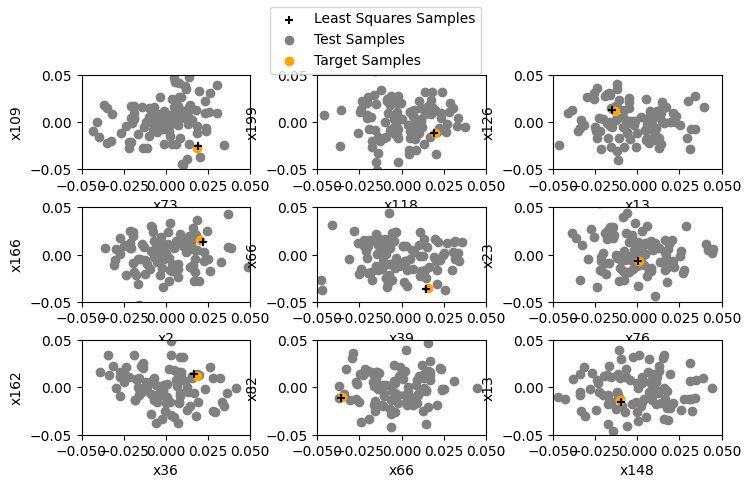

In [51]:
test_samples = np.random.multivariate_normal(np.zeros(d), ld_model.Hinv, size=100)
fig, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        a = 1
        b = 1
        while a == b:    
            a = np.random.randint(0, d)
            b = np.random.randint(0, d)
            if a != b: 
                ax[i][j].scatter(samples[:,a], samples[:,b], color='Black', marker='+', label="Least Squares Samples")
                ax[i][j].scatter(test_samples[:,a], test_samples[:,b], c='Grey', zorder=-1, label="Test Samples")
                ax[i][j].scatter(trueSamples[:,a], trueSamples[:,b], c='Orange', zorder=-1, label="Target Samples")
                ax[i][j].set_xlabel("x{}".format(a))
                ax[i][j].set_ylabel("x{}".format(b))
                ax[i][j].set_xlim(-0.05,0.05)
                ax[i][j].set_ylim(-0.05,0.05)
handles, labels = ax[1][2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.1,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

In [7]:
sghmc_sampler = SGHMCsampler(model, 500, ld_model.mean, 300, ld_model.mean, Minv=np.diag(np.full(d, 1)), gamma=0.0001, epsilon=0.0001)

In [8]:
N = 100
sghmc_samples = np.zeros((N, d))
for i in range(N):
	sghmc_samples[i] = sghmc_sampler.sample()

100%|██████████| 300/300 [00:08<00:00, 34.47it/s]


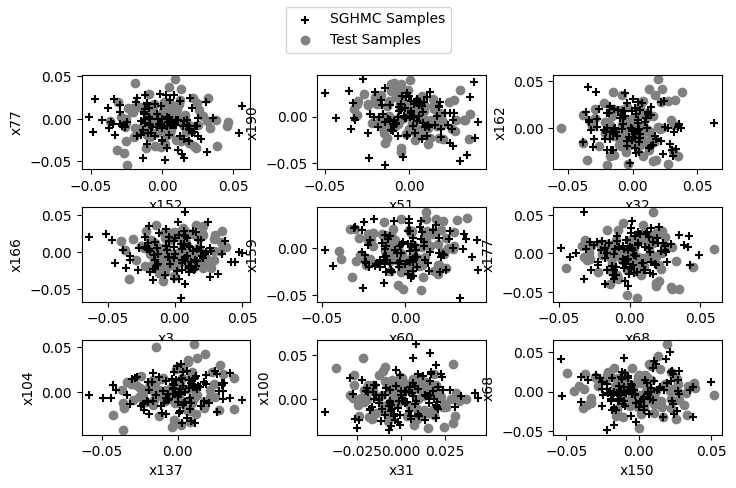

In [16]:
test_samples = np.random.multivariate_normal(np.zeros(d), ld_model.Hinv, size=100)
fig, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        a = 1
        b = 1
        while a == b:    
            a = np.random.randint(0, d)
            b = np.random.randint(0, d)
            if a != b: 
                ax[i][j].scatter(sghmc_samples[:,a], sghmc_samples[:,b], color='Black', marker='+', label="SGHMC Samples")
                ax[i][j].scatter(test_samples[:,a], test_samples[:,b], c='Grey', zorder=-1, label="Test Samples")
                ax[i][j].set_xlabel("x{}".format(a))
                ax[i][j].set_ylabel("x{}".format(b))
                #ax[i][j].set_xlim(-0.05,0.05)
                #ax[i][j].set_ylim(-0.05,0.05)
handles, labels = ax[1][2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.1,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

In [17]:
print(sghmc_samples.shape)

(100, 200)


In [18]:
def get_bin_index(coord, bottom_left_x, top_right_x, n, m):
	def find_index(x, xmin, xmax, n):
		index = int(((x - xmin) * n) / (xmax - xmin))
		if index == n:
			index -= 1
		return index
	return (find_index(coord[0], bottom_left_x[0], top_right_x[0], n), find_index(coord[1], bottom_left_x[1], top_right_x[1], m))

def make_histogram(X, n, d1, d2, Hinv, mu):
	# require n > 1
	assert n > 1
	
	# compute 2D mean and covariances for the particular dimensions
	mu = np.array([mu[d1], mu[d2]])
	Hinv = np.array([[Hinv[d1,d1], Hinv[d1,d2]],[Hinv[d2,d1], Hinv[d2,d2]]])

	# compute boundary of area to consider
	percentile_point = 2.3263
	bottom_left = [mu[0] - percentile_point * np.sqrt(Hinv[0,0]), mu[1] - percentile_point * np.sqrt(Hinv[1,1])]
	top_right = [mu[0] + percentile_point * np.sqrt(Hinv[0,0]), mu[1] + percentile_point * np.sqrt(Hinv[1,1])]

	# function to check for outliers
	def is_within_rectangle(x):
		return np.all(x >= bottom_left) and np.all(x <= top_right)

	# check if outliers exist
	outliers = []
	for x in X:
		x = np.array([x[d1], x[d2]])
		if not is_within_rectangle(x):
			outliers.append(x)
	if len(outliers) != 0:
		# correct boundary box for outliers
		outliers = np.array(outliers)
		top_right[0] = np.max((top_right[0], np.max(outliers[:,0])))
		top_right[1] = np.max((top_right[1], np.max(outliers[:,1])))
		bottom_left[0] = np.min((bottom_left[0], np.min(outliers[:,0])))
		bottom_left[1] = np.min((bottom_left[1], np.min(outliers[:,1])))

	# compute number of bins along y axis based on scale
	m = np.max((2, int(n*np.abs(bottom_left[1]-top_right[1] / bottom_left[0]-top_right[0])))) # make m at least 2 

	# compute individual bin sizes
	dx = np.abs((bottom_left[0] - top_right[0])) / n
	dy = np.abs((bottom_left[1] - top_right[1])) / m

	# form histogram
	hist = np.zeros((n,m))
	outliers = []
	for x in X:
		x = np.array([x[d1], x[d2]])
		hist[get_bin_index(x, bottom_left, top_right, n, m)] += 1

	# compute coordinates of bin centres
	coords = np.full((n,m,2), bottom_left)
	coords -= np.array([dx/2, dy/2])
	for i in range(n):
		for j in range(m):
			coords[i][j] += np.array([dx*(1+i), dy*(1+j)])

	return hist, coords

def compute_distance_metric(hist, coords, cov, mu):
	"""
	Computes a distance metric between an approximate coordinate distribution defined by hist and coords, and a Gaussian with
	mean mu and covariance Hinv, also considers any outlier samples defined by outliers, which are assumed to lie in regions
	with Gaussian probability 0
	"""
	# ensure histogram and coordinates shape is the same
	assert hist.shape[:2] == coords.shape[:2]

	# compute bin size (assume uniform steps in x and y direction)
	dx = coords[0,0,0] - coords[1,0,0]
	dy = coords[0,0,1] - coords[0,1,1]
	dA = dx*dy

	# normalize histogram
	prob = hist / np.sum(hist)

	# get gaussian random variable
	rv = multivariate_normal(mu, cov)

	# compute metric
	metric = 0
	area = 0
	for i in range(coords.shape[0]):
		for j in range(coords.shape[1]):
			area += dA*rv.pdf(coords[i][j])
			metric += (prob[i][j] - dA*rv.pdf(coords[i][j]))**2
	
	return np.sqrt(metric)


In [19]:
def calc_expected_distance_metric(N):
    metric = 0
    for i in range(N):
    # sample two random dimensions
        d1 = np.random.randint(0, d)
        d2 = d1
        while d2 == d1:
            d2 = np.random.randint(0, d)

        mu = ld_model.mean
        Hinv = ld_model.Hinv
        hist, coords = make_histogram(sghmc_samples, 15, d1, d2, Hinv, mu)
        metric += compute_distance_metric(hist, coords, np.array([[Hinv[d1,d1], Hinv[d1,d2]],[Hinv[d2,d1], Hinv[d2,d2]]]), np.array([mu[d1], mu[d2]]))
    metric /= N
    return metric
print(calc_expected_distance_metric(100))

1.051981594315541


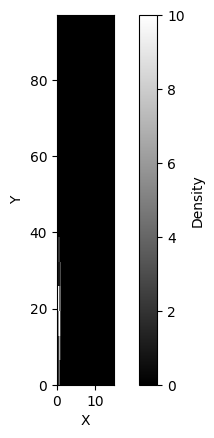

In [20]:
def plot_density(bins):
    """
    Given a 2D array of bins with values equal to a count,
    this function plots a visual representation of the density.
    """
    # Calculate the extent of the plot
    x_min, x_max = 0, bins.shape[0]
    y_min, y_max = 0, bins.shape[1]

    # Plot the density
    fig, ax = plt.subplots()
    img = ax.imshow(bins, cmap='gray', interpolation='nearest', extent=[x_min, x_max, y_min, y_max])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Add colorbar
    cbar = fig.colorbar(img)
    cbar.set_label('Density')

    plt.show()
d1 = np.random.randint(0, d)
d2 = d1
while d2 == d1:
    d2 = np.random.randint(0, d)

mu = ld_model.mean
Hinv = ld_model.Hinv
hist, coords = make_histogram(sghmc_samples, 15, d1, d2, Hinv, mu)
plot_density(hist)